# 데이터 전처리

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))

In [8]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [ ]:
# 이렇게 테스트 데이터를 분리하여서 학습시키면 클래스 불균형이 일어날수 있음

In [9]:
train_input,test_input,train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target,random_state=42)

In [10]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# 비율이 어느정도 섞여서 들어가 있음

In [11]:
# 일단 최근접으로 또다시 해볼까?
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

1.0


In [ ]:
kn.predict([[25, 150]])
# 이 값은 도미인데 빙어로 분류했다!
# 이러면 뭐가 문제인지 이 값이 어디에 있는 건지 산점도를 찍어보면 알수 있을것 같다.

array([0.])

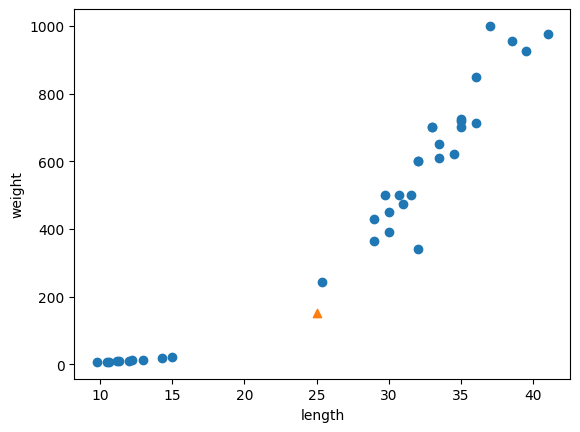

In [13]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
# 그럼 25,150의 이웃인 5개는 무엇일까
distances, indexes = kn.kneighbors([[25,150]])

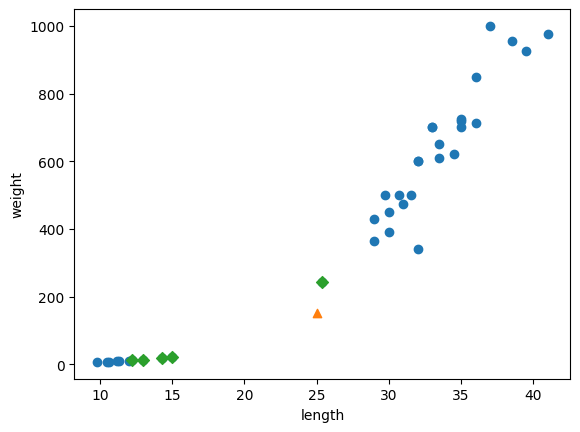

In [15]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
# 한개만 도미이고 나머지는 다 빙어가 이웃인것으로 발견된다.
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [ ]:
# 이렇게 산점도로 보면 도미에 가까워보여야하는데 왜 빙어라고 하는걸까?
# 하지만 여기서 보면 축의 오류이다. 
# 축을 동일하게 맞춰주면 어느 축이 더 학습에 영향을 주는지 알수 있을 것이다.

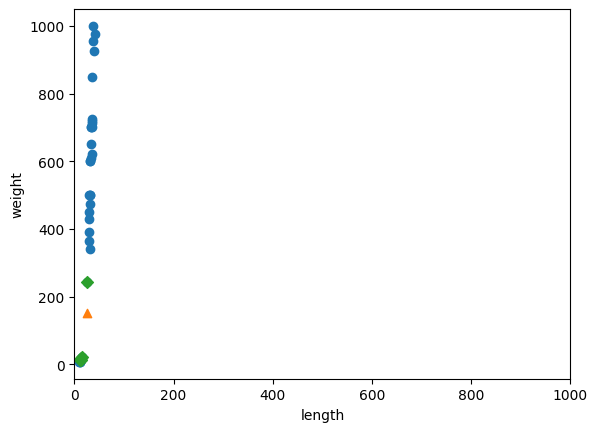

In [17]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
# 이렇게 되어있으니까 전처리가 필요한것
# 흔히 이렇게 축이 다른 경우에는 표준점수 (z점수)를 사용한다.

In [19]:
mean = np.mean(train_input,axis=0)
std = np.std(train_input,axis=0)

In [20]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [21]:
train_scaled = (train_input - mean) / std

In [22]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) /std

In [23]:
kn.score(test_scaled, test_target)

1.0